In [1]:
# Utils
from math import atan2

def orientation(a, b, c):
    ob = (b[0]-a[0], b[1]-a[1])
    oc = (c[0]-a[0], c[1]-a[1])
    det = ob[0]*oc[1]-ob[1]*oc[0]
    return -1 if det<0 else 1 if det>0 else 0

# Checks if the point b its on the segment ac
def onSegment(a,b,c):
    on_x_proyection = b[0]<=max(a[0],c[0]) and b[0]>= min(a[0],c[0])
    # print(f"pr_x: {on_x_proyection}")
    on_y_proyection = b[1]<=max(a[1],c[1]) and b[1]>= min(a[1],c[1])
    # print(f"pr_y: {on_y_proyection}")
    if(on_x_proyection and on_y_proyection): return True
    return False

def doIntersect(a,b,c,d):
    # Orientations between segment and the other points
    o_c_segment_ab = orientation(a,b,c)
    o_d_segment_ab = orientation(a,b,d)
    o_a_segment_cd = orientation(c,d,a)
    o_b_segment_cd = orientation(c,d,b)

    # Case 1
    if(o_c_segment_ab != o_d_segment_ab and o_a_segment_cd != o_b_segment_cd):
        return True
    
    # Special cases when they are colinear
    # print("Case 1")
    if(o_c_segment_ab == 0 and onSegment(a,c,b)): return True
    # print("Case 2")
    if(o_d_segment_ab == 0 and onSegment(a,d,b)): return True
    # print("Case 3")
    if(o_a_segment_cd == 0 and onSegment(c,a,d)): return True
    # print("Case 4")
    if(o_b_segment_cd == 0 and onSegment(c,b,d)): return True

    return False

def get_convex_hull(p):
    n = len(p)
    if n<3: return
    hull = []
    s_y = min(p, key=lambda x: x[1])
    p.sort(key=lambda x: (atan2(x[1]-s_y[1], x[0]-s_y[0]), -x[1], x[0]))
    for point in p:
        while len(hull)>=2 and orientation(hull[-2], hull[-1], point) <= 0:
            hull.pop()
        hull.append(point)
    return hull

# Lecture 1

# Lecture 2

## Sweep Line Algorithm

### Introduction

Sweep line algorithm is a general algorithm for solving problems that involve a set of geometric objects. The algorithm is based on the idea of sweeping a line across the plane and performing certain operations as the line sweeps across the objects. The algorithm is used to solve problems such as finding the intersection of line segments, finding the closest pair of points, and finding the convex hull of a set of points.

### Basic Idea

The basic idea of the sweep line algorithm is to sweep a line across the plane and perform certain operations as the line sweeps across the objects. The line is swept across the plane in a certain direction, and as the line sweeps across the objects, certain operations are performed. The operations that are performed depend on the problem that is being solved. For example, if the problem is to find the intersection of line segments, then the operations that are performed as the line sweeps across the line segments are to check for intersections between the line segments.

# Lecture 3

In [2]:
# Finds the point of intersection between two segments
def get_intersection_point(s1,s2):
    x1, y1 = s1[0]
    x2, y2 = s1[1]
    x3, y3 = s2[0]
    x4, y4 = s2[1]
    # print(f"({x1},{y1})-({x2},{y2})")
    # print(f"({x3},{y3})-({x4},{y4})")
    # print("----")
    # Denominator
    den = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
    # print(f"den: {den}")
    if den == 0: return None
    # Numerators
    t = (x1-x3)*(y3-y4) - (y1-y3)*(x3-x4)
    u = (x1-x2)*(y1-y3) - (y1-y2)*(x1-x3)
    # print(f"t: {t}")
    # print(f"u: {u}")
    # print("----")
    t = t/den
    u = -u/den
    # print(f"t: {t}")
    # print(f"u: {u}")
    if t>=0 and t<=1 and u>=0 and u<=1:
        x = x1 + t*(x2-x1)
        y = y1 + t*(y2-y1)
        return (x,y)
    return None

    

In [3]:
# Sweepline algorithm for finding the intersection of segments
def sweep_line(segments):
    Q = []
    inter_points = []
    segments.sort(key=lambda x: x[1])
    for segment in segments:
        if not Q:
            Q.append(segment)
        else:
            for s in Q:
                if doIntersect(s[0], s[1], segment[0], segment[1]):
                    inter_points.append(get_intersection_point(s, segment))
            Q.append(segment)
            Q.sort(key=lambda x: x[1])
    return inter_points


In [4]:
# Sweepline algorithm for finding the intersection of segments using a balanced binary search tree
from self_balancing_binary_search_tree import SBBST

def sweep_line_bst(segments):
    Q = SBBST()
    inter_points = []
    segments.sort(key=lambda x: x[1])
    for segment in segments:
        if not Q.getSize():
            Q.insert(segment)
        else:
            for s in Q.inOrder():
                if doIntersect(s[0], s[1], segment[0], segment[1]):
                    inter_points.append(get_intersection_point(s, segment))
            Q.insert(segment)
    return inter_points

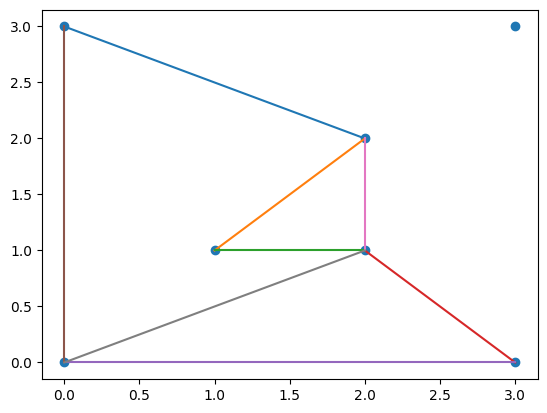

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (2.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (2.0, 2.0),
 (2.0, 1.0),
 (0.0, 3.0),
 (2.0, 2.0),
 (2.0, 2.0),
 (3.0, 0.0),
 (2.0, 1.0),
 (2.0, 1.0),
 (2.0, 1.0)]

In [5]:
# Test
import matplotlib.pyplot as plt
import numpy as np
p = [(0,3), (2,2), (1,1), (2,1), (3,0), (0,0), (3,3)]
segments = [(p[0], p[1]), (p[1], p[2]), (p[2], p[3]), (p[3], p[4]), (p[4], p[5]), (p[5], p[0]), (p[1], p[3]), (p[3], p[5])]

plt.scatter(*zip(*p))
for segment in segments:
    plt.plot(*zip(*segment))
plt.show()
sweep_line(segments)

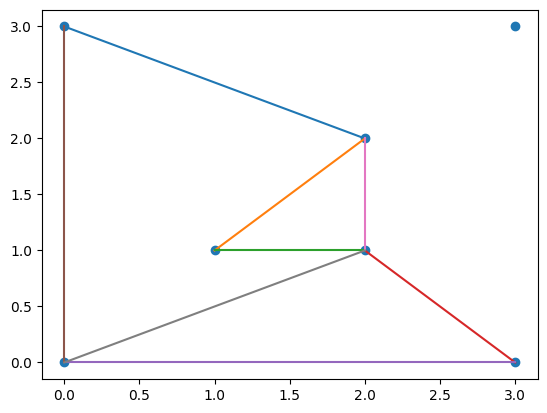

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (2.0, 1.0),
 (1.0, 1.0),
 (2.0, 1.0),
 (2.0, 1.0),
 (2.0, 2.0),
 (0.0, 3.0),
 (2.0, 2.0),
 (2.0, 2.0),
 (2.0, 1.0),
 (2.0, 1.0),
 (2.0, 1.0),
 (3.0, 0.0)]

In [8]:
# Test
import matplotlib.pyplot as plt
import numpy as np
p = [(0,3), (2,2), (1,1), (2,1), (3,0), (0,0), (3,3)]
segments = [(p[0], p[1]), (p[1], p[2]), (p[2], p[3]), (p[3], p[4]), (p[4], p[5]), (p[5], p[0]), (p[1], p[3]), (p[3], p[5])]

plt.scatter(*zip(*p))
for segment in segments:
    plt.plot(*zip(*segment))
plt.show()
sweep_line_bst(segments)

In [11]:
# Test
import matplotlib.pyplot as plt
from random import gauss

p = []
segments = []
for i in range(1000):
    p.append((gauss(0, 1), gauss(0, 1)))
    p.append((gauss(0, 1), gauss(0, 1)))
    segments.append((p[-2], p[-1]))

plt.scatter(*zip(*p))
for segment in segments:
    plt.plot(*zip(*segment))

inter_points = sweep_line(segments)
for point in inter_points:
    plt.scatter(*point, color='red')
plt.show()

KeyboardInterrupt: 